In [1]:
!pip install torch torchvision tqdm
import torch, os
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded=files.upload()

Saving %2Fmodels%2Fmodel-12.pth to %2Fmodels%2Fmodel-12.pth


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=256, kernel_size=5)#32-5+1=28
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)#14
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=1024, kernel_size=3)#14-3+1=12
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)#6
        self.conv3 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=3)#6-3+1=4
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)#2
        self.conv4 = nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=1)#2
        self.pool4= nn.MaxPool2d(kernel_size=2, stride=2)#1
        self.fc1 = nn.Linear(in_features=2048*1*1, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=10)


    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 2048*1*1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
net=net.cuda()

In [9]:
net

Net(
  (conv1): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(256, 1024, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(2048, 2048, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
weights = torch.load('%2Fmodels%2Fmodel-12.pth')

In [0]:
net.load_state_dict(weights)

In [12]:
weights

OrderedDict([('conv1.weight',
              tensor([[[[ 0.1607,  0.0300,  0.0495, -0.0038, -0.1202],
                        [ 0.0479,  0.2030,  0.0337, -0.1665, -0.1464],
                        [-0.0513, -0.0323,  0.0439, -0.0684, -0.0651],
                        [-0.1208, -0.1367, -0.1256,  0.0353,  0.0408],
                        [-0.0197, -0.0656, -0.0009, -0.1491, -0.1029]],
              
                       [[ 0.0501,  0.0720,  0.0153, -0.1668, -0.0843],
                        [-0.0742,  0.0563,  0.0624, -0.1607, -0.1463],
                        [-0.1306, -0.1384, -0.0893,  0.0780,  0.0444],
                        [ 0.0036, -0.1225, -0.0406,  0.1260, -0.0297],
                        [ 0.0293, -0.1219, -0.0692, -0.0858,  0.0656]],
              
                       [[ 0.0137, -0.0751, -0.1128, -0.0165, -0.0784],
                        [ 0.0293,  0.1845,  0.0085,  0.0335,  0.0495],
                        [-0.1128,  0.1104,  0.1603,  0.1586,  0.1684],
               

In [13]:
for param in net.parameters():
  print(param.data)

tensor([[[[ 0.1607,  0.0300,  0.0495, -0.0038, -0.1202],
          [ 0.0479,  0.2030,  0.0337, -0.1665, -0.1464],
          [-0.0513, -0.0323,  0.0439, -0.0684, -0.0651],
          [-0.1208, -0.1367, -0.1256,  0.0353,  0.0408],
          [-0.0197, -0.0656, -0.0009, -0.1491, -0.1029]],

         [[ 0.0501,  0.0720,  0.0153, -0.1668, -0.0843],
          [-0.0742,  0.0563,  0.0624, -0.1607, -0.1463],
          [-0.1306, -0.1384, -0.0893,  0.0780,  0.0444],
          [ 0.0036, -0.1225, -0.0406,  0.1260, -0.0297],
          [ 0.0293, -0.1219, -0.0692, -0.0858,  0.0656]],

         [[ 0.0137, -0.0751, -0.1128, -0.0165, -0.0784],
          [ 0.0293,  0.1845,  0.0085,  0.0335,  0.0495],
          [-0.1128,  0.1104,  0.1603,  0.1586,  0.1684],
          [ 0.1109, -0.0599, -0.0792,  0.0548,  0.1521],
          [ 0.1108,  0.0711,  0.0288, -0.0549,  0.1125]]],


        [[[-0.0237, -0.0283, -0.1668, -0.0667,  0.0676],
          [-0.0147, -0.1119,  0.0078,  0.1208,  0.1591],
          [-0.0913, -0.

In [16]:
transform = transforms.Compose(

    [transforms.ToTensor(),

     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import torch.nn.functional as outnorm


Files already downloaded and verified


In [17]:
'''
image = cv2.imread('airplane1.png',0)
with torch.no_grad():
  var_image = torch.Tensor(image).cuda()
  output=net(var_image)
''' 
def test(testloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()        
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
                                    100 * correct / total))
test(testloader, net)
  


100%|██████████| 2500/2500 [00:15<00:00, 160.09it/s]

Accuracy of the network on the 10000 test images: 81 %


In [0]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


  0%|          | 0/2500 [00:00<?, ?it/s]

Original classes:
  cat  ship  ship plane
Predicted classes are:
cat
ship
ship
plane


  0%|          | 1/2500 [00:16<11:27:37, 16.51s/it]

Original classes:
 frog  frog   car  frog
Predicted classes are:
frog
frog
car
frog


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
  0%|          | 2/2500 [00:32<11:24:39, 16.44s/it]

Original classes:
  cat   car plane truck
Predicted classes are:
cat
car
dog
truck


  0%|          | 3/2500 [00:49<11:24:56, 16.46s/it]

Original classes:
  dog horse truck  ship
Predicted classes are:
dog
horse
truck
ship


  0%|          | 4/2500 [01:05<11:24:55, 16.46s/it]

Original classes:
  dog horse  ship  frog
Predicted classes are:
dog
horse
ship
frog


100%|██████████| 2500/2500 [01:24<00:00, 29.47it/s]


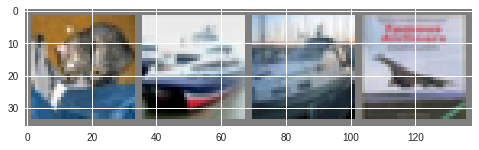

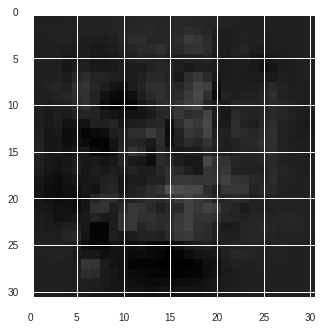

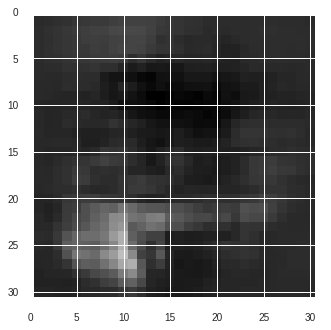

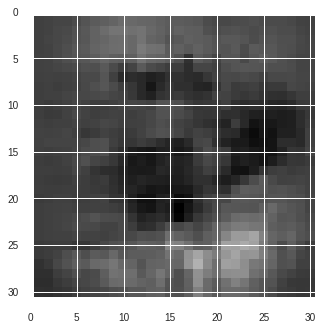

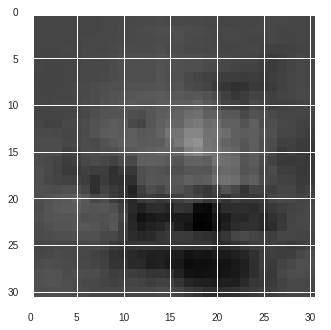

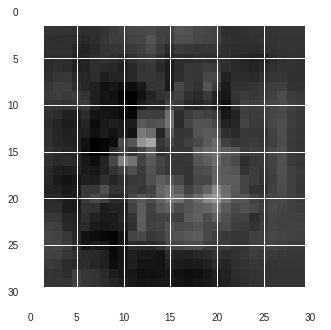

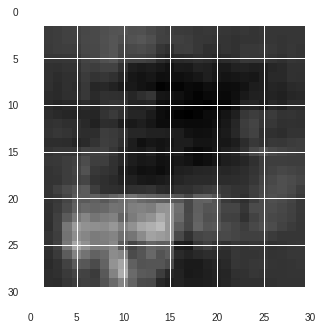

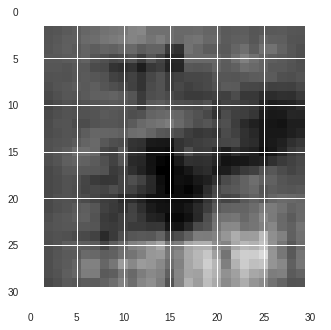

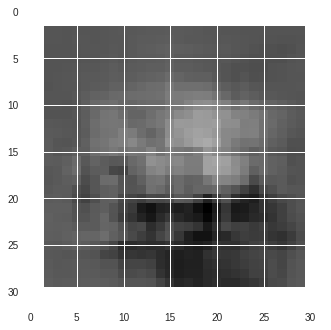

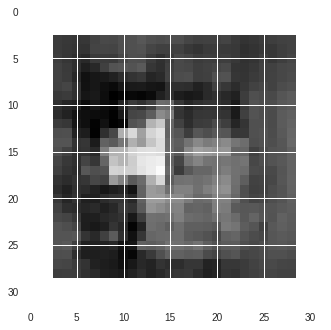

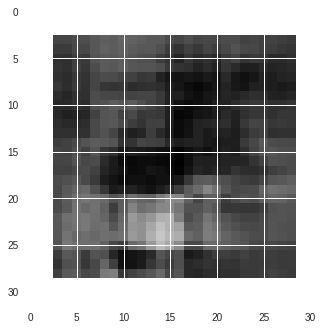

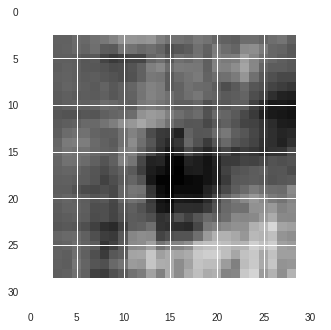

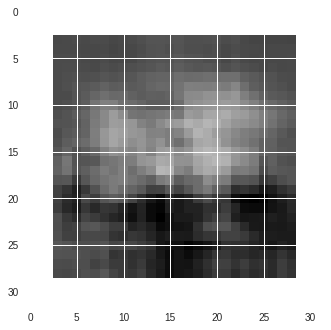

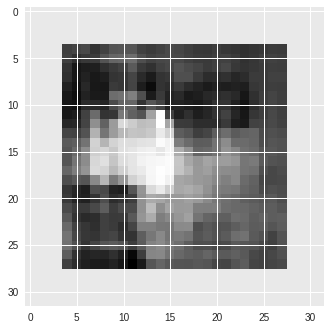

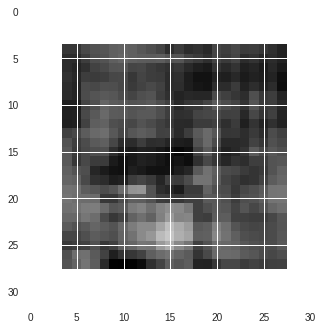

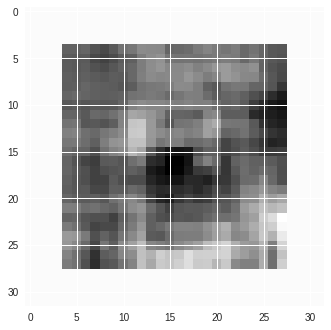

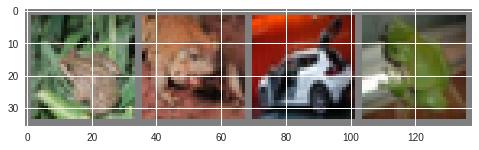

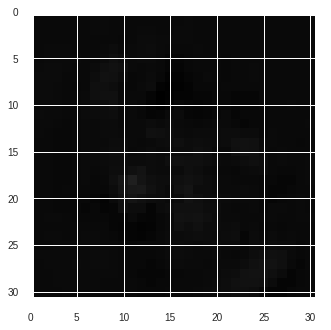

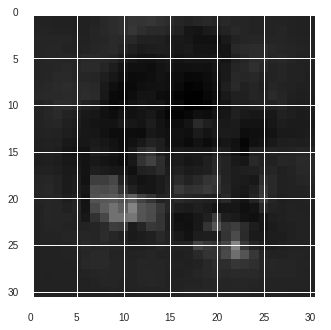

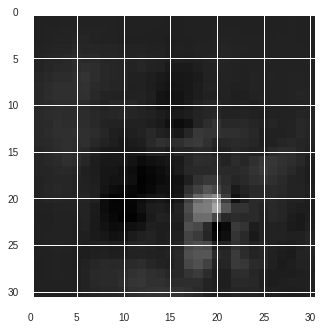

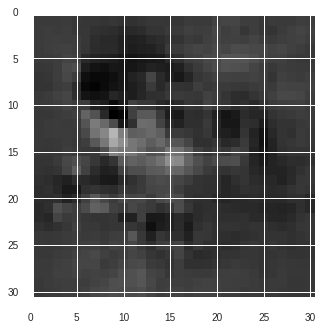

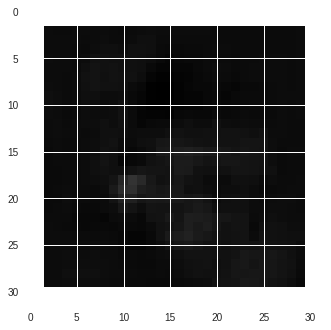

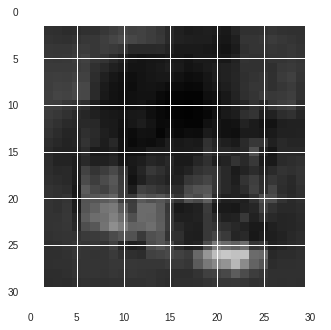

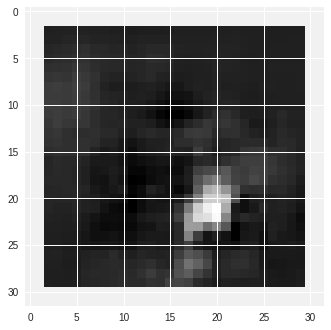

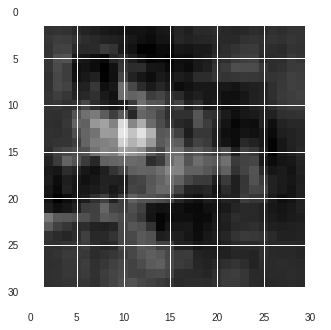

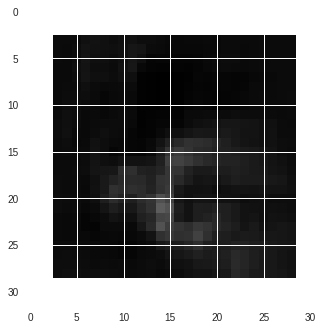

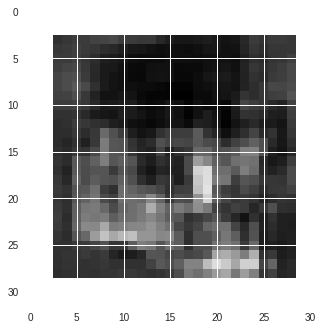

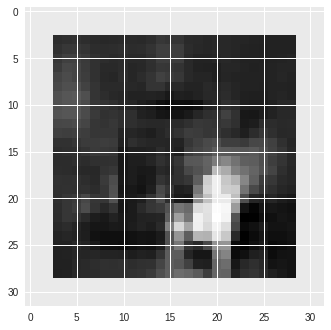

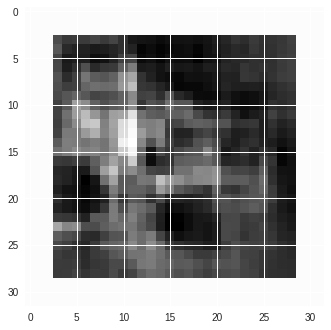

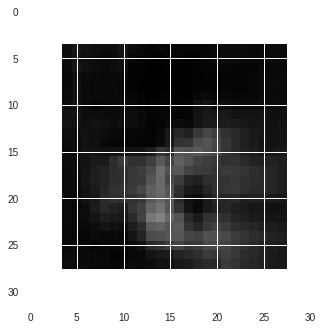

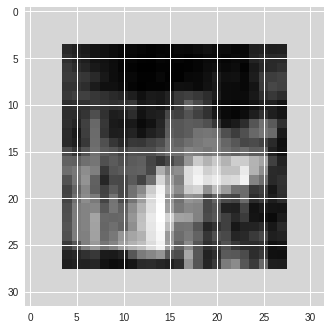

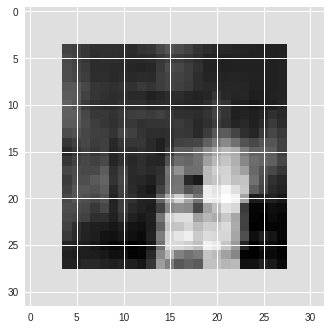

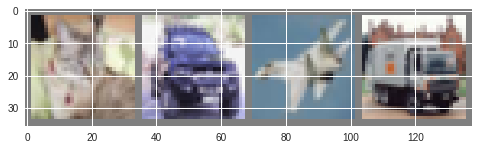

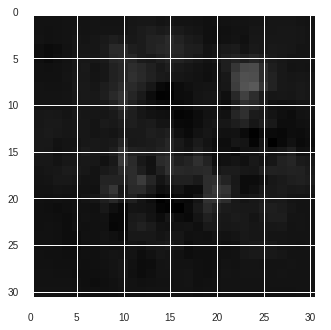

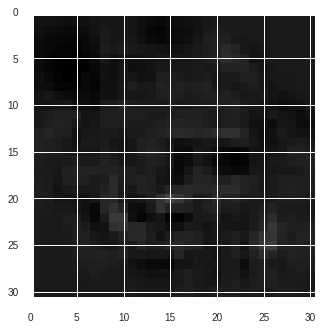

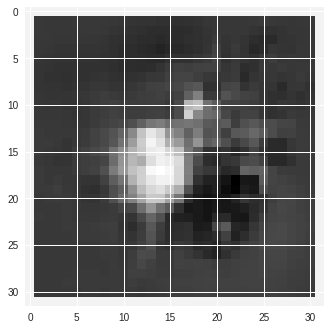

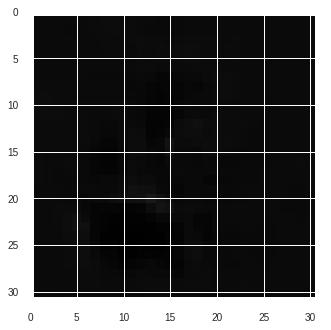

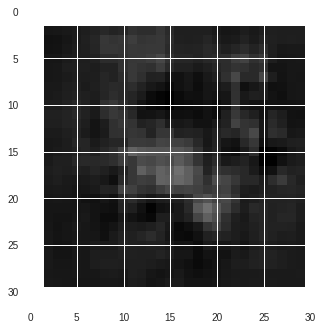

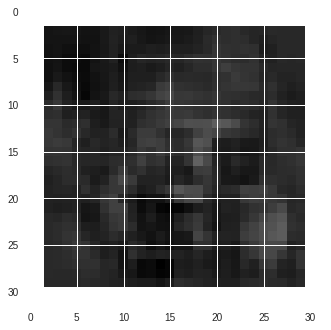

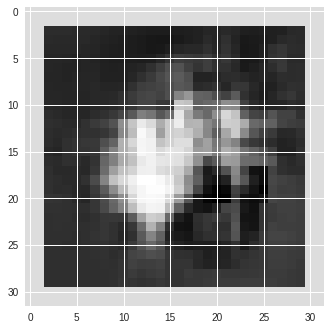

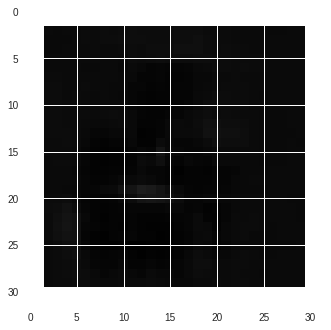

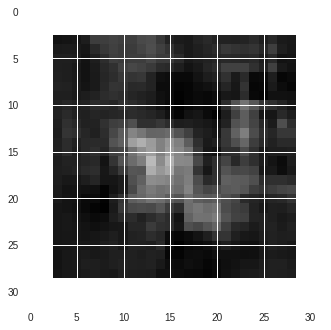

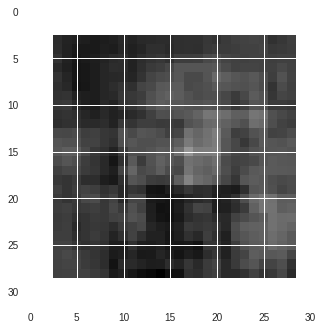

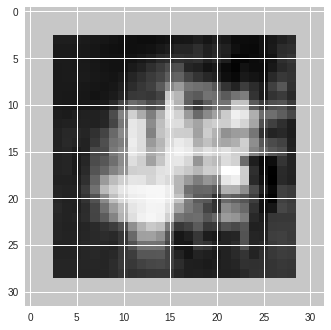

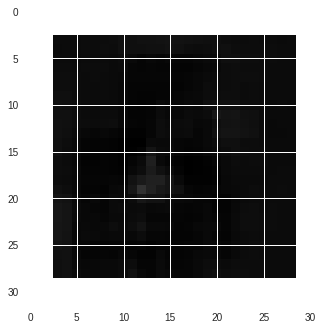

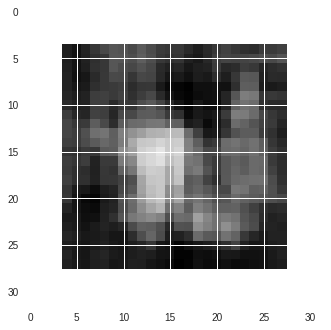

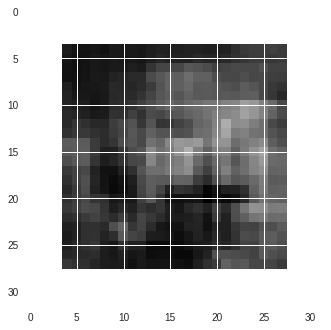

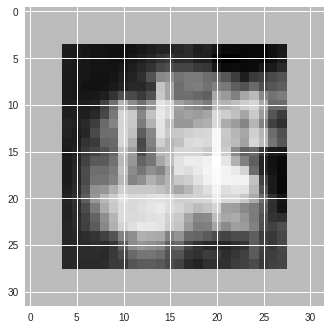

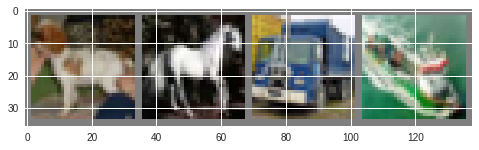

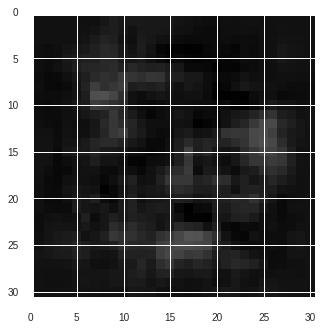

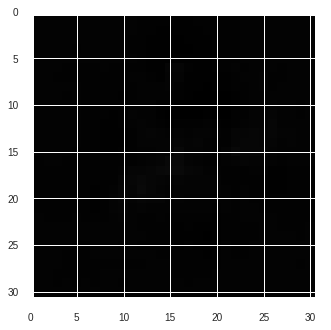

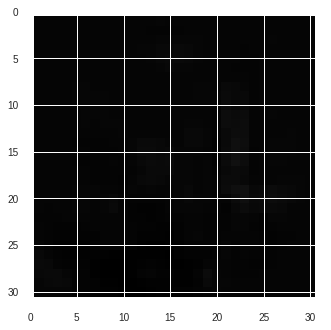

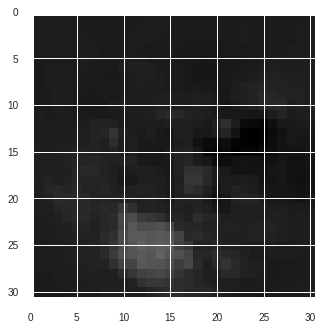

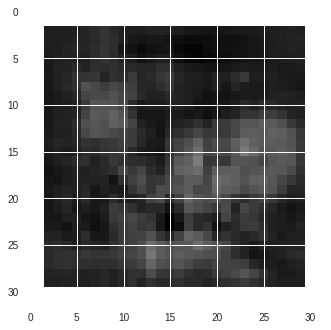

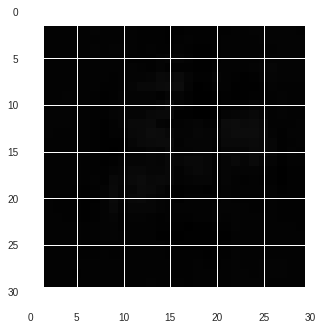

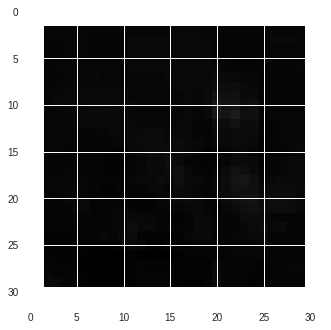

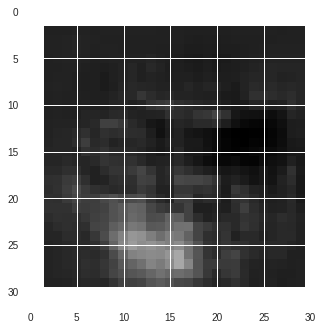

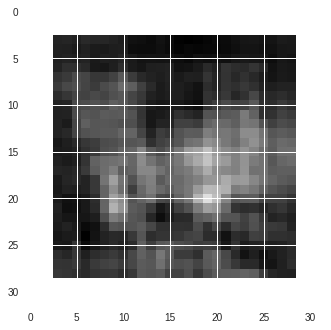

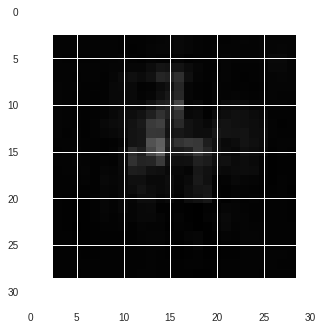

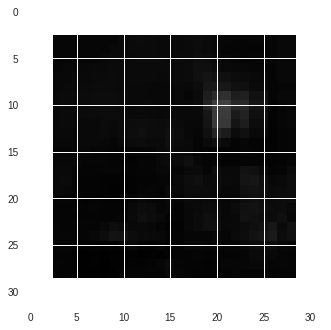

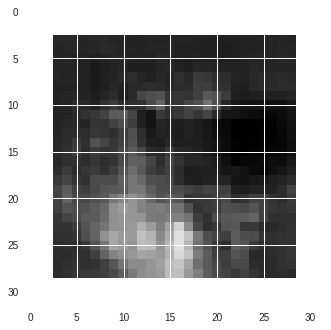

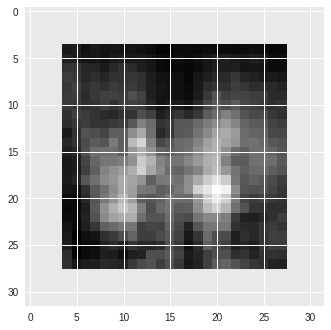

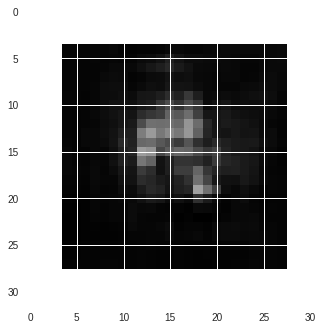

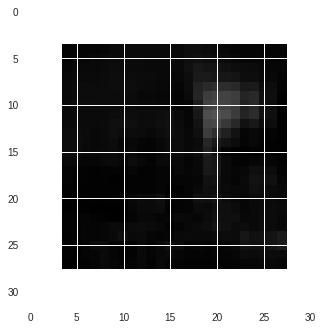

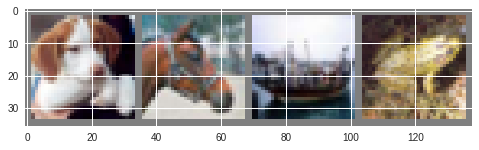

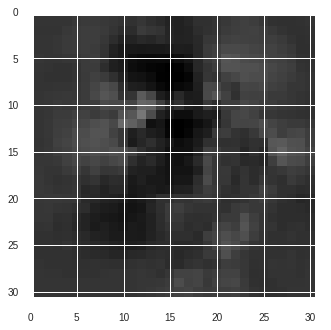

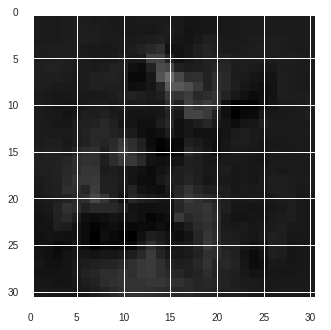

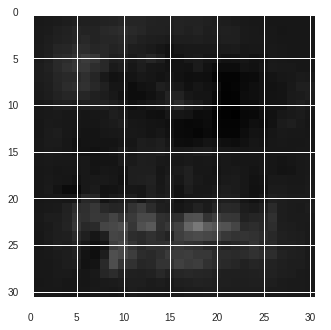

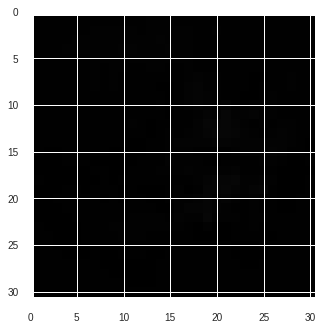

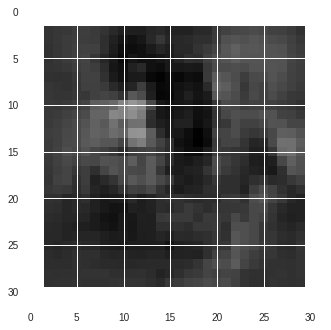

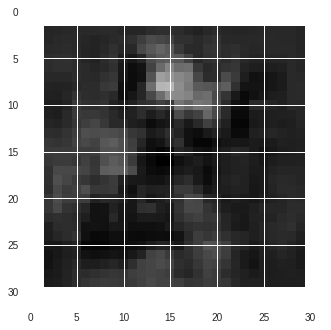

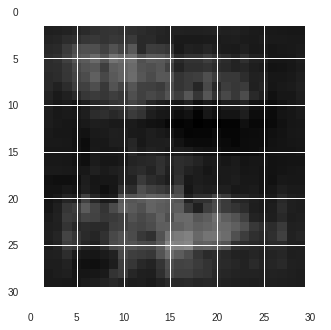

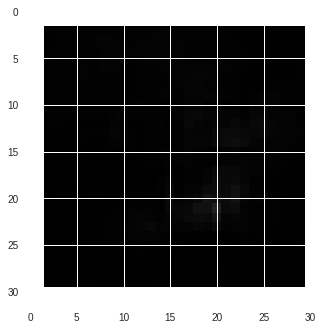

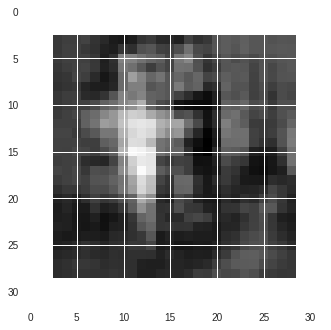

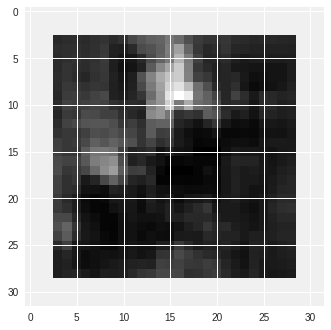

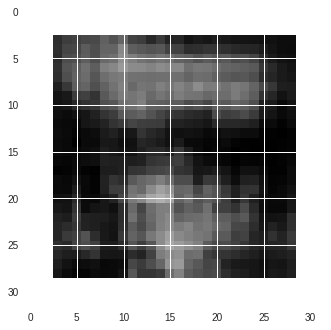

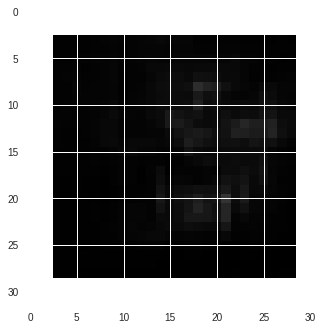

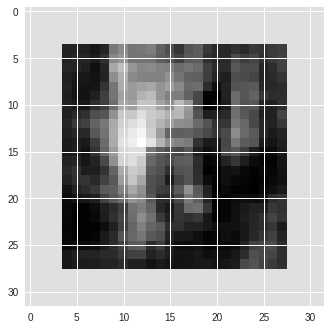

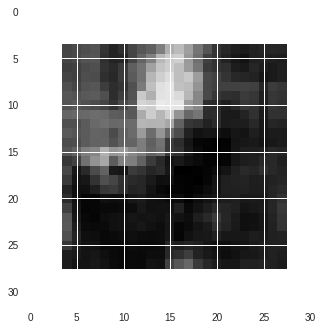

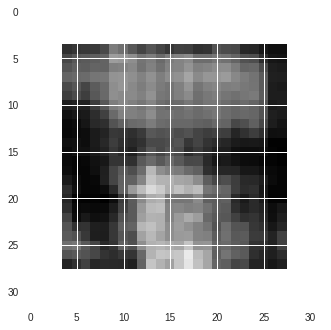

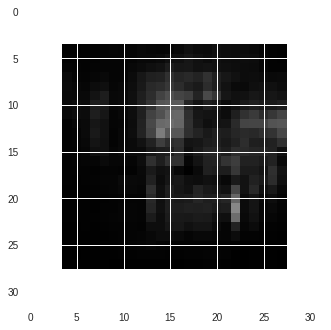

In [19]:
iteration=0#5 iterations, batch size is 4, therefore we get 20 images to experiment on in total

for data in tqdm(testloader):
  if(iteration<5):  
    images,labels=data
    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print('Original classes:')
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    if torch.cuda.is_available():
      images, labels = images.cuda(), labels.cuda()        
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    label0 = int(predicted[0])
    label1 = int(predicted[1])
    label2 = int(predicted[2])
    label3 = int(predicted[3])
    
    
    print('Predicted classes are:')
    print(classes[label0])
    print(classes[label1])
    print(classes[label2])
    print(classes[label3])
    confidence = np.zeros((4,32,32))
    #3*3
    for i in range(1,31):
      for j in range(1,31):
        img,labels = data
        img = img.cuda()
        img[:,:,i-1:i+2,j-1:j+2]=0
        
        outputs = net(img)
        outputs=outnorm.normalize(outputs, p=2, dim=1)#normalise outputs so that there is no numerical instability
        confidence[0][i][j]=float(outputs.data[0][label0])
        confidence[1][i][j]=float(outputs.data[1][label1])
        confidence[2][i][j]=float(outputs.data[2][label2])
        confidence[3][i][j]=float(outputs.data[3][label3])
    plt.figure()
    plt.imshow(confidence[0])
    plt.figure()
    plt.imshow(confidence[1])
    plt.figure()
    plt.imshow(confidence[2])
    plt.figure()
    plt.imshow(confidence[3])
    
    confidence = np.zeros((4,32,32))
    #5*5
    for i in range(2,30):
      for j in range(2,30):
        img,labels = data
        img = img.cuda()
        img[:,:,i-2:i+3,j-2:j+3]=0
        outputs = net(img)
        outputs=outnorm.normalize(outputs, p=2, dim=1)
        confidence[0][i][j]=float(outputs.data[0][label0])
        confidence[1][i][j]=float(outputs.data[1][label1])
        confidence[2][i][j]=float(outputs.data[2][label2])
        confidence[3][i][j]=float(outputs.data[3][label3])
    plt.figure()
    plt.imshow(confidence[0])
    plt.figure()
    plt.imshow(confidence[1])
    plt.figure()
    plt.imshow(confidence[2])
    plt.figure()
    plt.imshow(confidence[3])
    
    confidence = np.zeros((4,32,32))
    #7*7
    for i in range(3,29):
      for j in range(3,29):
        img,labels = data
        img = img.cuda()
        img[:,:,i-3:i+4,j-3:j+4]=0
        outputs = net(img)
        outputs=outnorm.normalize(outputs, p=2, dim=1)
        confidence[0][i][j]=float(outputs.data[0][label0])
        confidence[1][i][j]=float(outputs.data[1][label1])
        confidence[2][i][j]=float(outputs.data[2][label2])
        confidence[3][i][j]=float(outputs.data[3][label3])
    plt.figure()
    plt.imshow(confidence[0])
    plt.figure()
    plt.imshow(confidence[1])
    plt.figure()
    plt.imshow(confidence[2])
    plt.figure()
    plt.imshow(confidence[3])
    
    confidence = np.zeros((4,32,32))
    #9*9
    for i in range(4,28):
      for j in range(4,28):
        img,labels = data
        img = img.cuda()
        img[:,:,i-4:i+5,j-4:j+5]=0
        outputs = net(img)
        outputs=outnorm.normalize(outputs, p=2, dim=1)
        confidence[0][i][j]=float(outputs.data[0][label0])
        confidence[1][i][j]=float(outputs.data[1][label1])
        confidence[2][i][j]=float(outputs.data[2][label2])
        confidence[3][i][j]=float(outputs.data[3][label3])
    plt.figure()
    plt.imshow(confidence[0])
    plt.figure()
    plt.imshow(confidence[1])
    plt.figure()
    plt.imshow(confidence[2])
    plt.figure()
    plt.imshow(confidence[3])
    
    iteration=iteration+1
  